<a href="https://colab.research.google.com/github/sawible/AHHHHHHHHHHH/blob/main/GravWave_GW200224_222234.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing packages
import astropy.constants as ac
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [2]:
! pip install gwpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.2 MB/s eta 0:00:00
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp310-cp310-linux_x86_64.whl size=99226 sha256=638547deda26b5ed252d7944e36addfd17da1a265fa9c6b3256b1c907d563c41
  Stored in directory: /root/.cache/pip/wheels/6d/48/d1/3466977be4e41ba57f92ad0d5619f083df43cf319a151c4e06
Successfully built ligo-segments


In [3]:
t0 = 1266618172.4  #GW200224_222234

from gwpy.timeseries import TimeSeries # module
hdata = TimeSeries.fetch_open_data('H1', 1266618156, 1266618188) #getting the data from around the signal

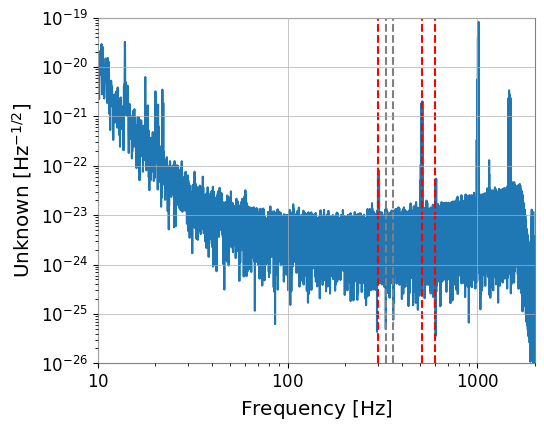

In [51]:
# -- Plot ASD
fig2 = hdata.asd().plot() # use fourier transform to show which frequencies show up the most
plt.xlim(10,2000)
ymin = 1e-26
ymax = 1e-19
plt.ylim(ymin, ymax)

# define peaks
# the grey ones im not so sure about but i'll knock them anyways just to see
plt.vlines(300, ymin, ymax, linestyle="dashed", color="red")
plt.vlines(330, ymin, ymax, linestyle="dashed", color="gray")
plt.vlines(360, ymin, ymax, linestyle="dashed", color="gray")
plt.vlines(510, ymin, ymax, linestyle="dashed", color="red")
plt.vlines(600, ymin, ymax, linestyle="dashed", color="red")


In [52]:
from gwpy.signal import filter_design
bp = filter_design.bandpass(50, 250, hdata.sample_rate)

notches = [filter_design.notch(line, hdata.sample_rate) for #create a notch filter to remove peaks
           line in (300, 330, 360, 510, 600)]

zpk = filter_design.concatenate_zpks(bp, *notches)

hfilt = hdata.filter(zpk, filtfilt=True)


In [53]:
hdata = hdata.crop(*hdata.span.contract(1)) #cropping the data
hfilt = hfilt.crop(*hfilt.span.contract(1))

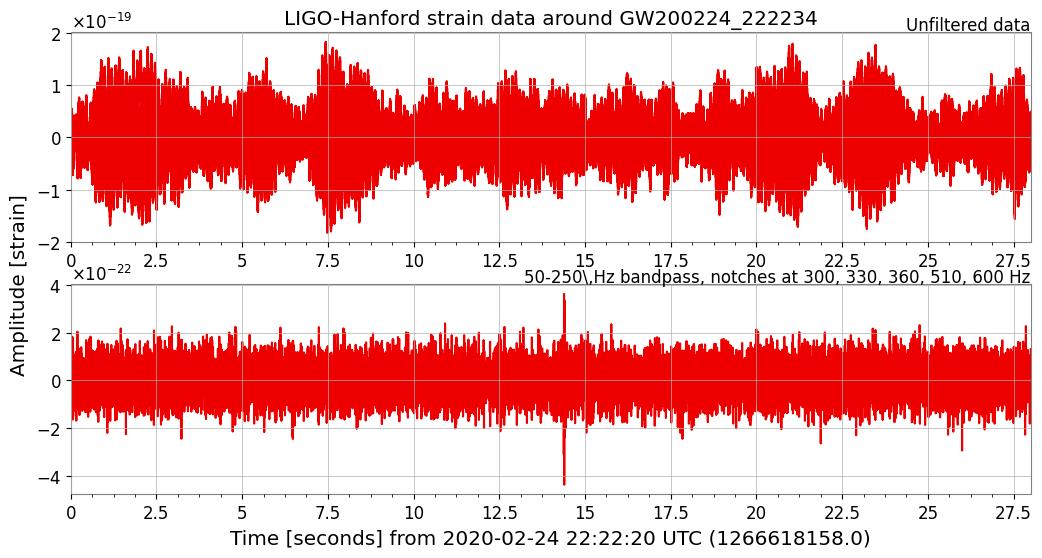

In [63]:
from gwpy.plot import Plot
plot = Plot(hdata, hfilt, figsize=[12, 6], separate=True, sharex=True,
            color='gwpy:ligo-hanford')
ax1, ax2 = plot.axes
ax1.set_title('LIGO-Hanford strain data around GW200224_222234')
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')
ax1.set_ylabel('Amplitude [strain]', y=-0.2)
ax2.set_ylabel('')
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 300, 330, 360, 510, 600 Hz',
         transform=ax2.transAxes, ha='right')
plot.show()

Text(1.0, 1.01, '50-250\\,Hz bandpass, notches at 300, 510 Hz')

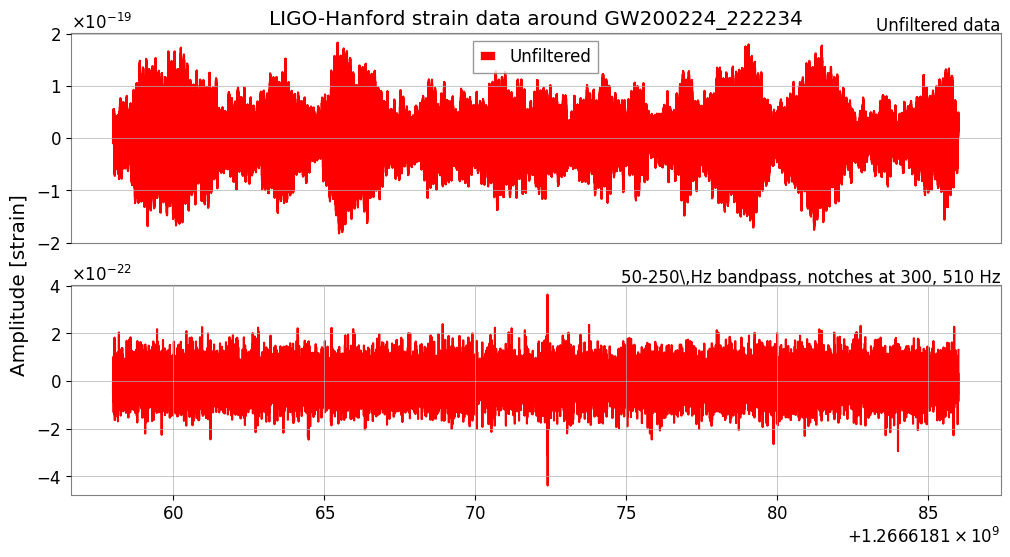

In [55]:
# now graphing without gwpy
plt.figure(figsize=[12, 6])

#top graph
ax1 = plt.subplot(2, 1, 1)
ax1.plot(hdata.times.value, hdata.value, color="red", label="Unfiltered")
plt.legend()
ax1.set_title('LIGO-Hanford strain data around GW200224_222234')
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')
ax1.xaxis.set_visible(False) # suppressing the x axis

#bottom graph
ax2 = plt.subplot(2, 1, 2)
ax2.plot(hfilt.times.value, hfilt.value, color="red", label="Filtered")
ax1.set_ylabel('Amplitude [strain]', y=-0.2)
ax2.set_ylabel('')
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 300, 330, 360, 510, 600 Hz',
         transform=ax2.transAxes, ha='right')


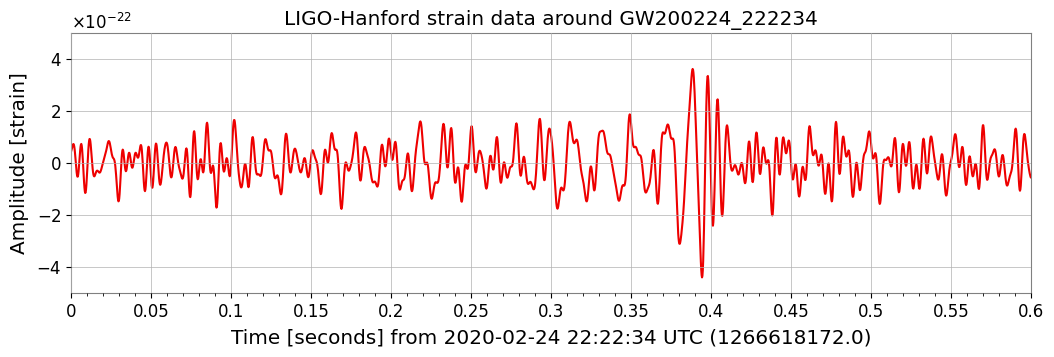

In [56]:
plot = hfilt.plot(color='gwpy:ligo-hanford')
ax = plot.gca()

#labels
ax.set_title('LIGO-Hanford strain data around GW200224_222234')
ax.set_ylabel('Amplitude [strain]')
ax.set_xscale('seconds', epoch=1266618172)

# graph limits
ax.set_ylim(-5e-22, 5e-22)
ax.set_xlim(1266618172, 1266618172.6)

plot.show()

x_val = plt.gca().lines[0].get_xdata()
y_val = plt.gca().lines[0].get_ydata()


In [57]:
ldata = TimeSeries.fetch_open_data('L1', 1266618156, 1266618188) #getting the data from around the signal from livingston
lfilt = ldata.filter(zpk, filtfilt=True)

In [58]:
lfilt.shift('6.9ms') # shift the data to account for location differences
lfilt *= -1

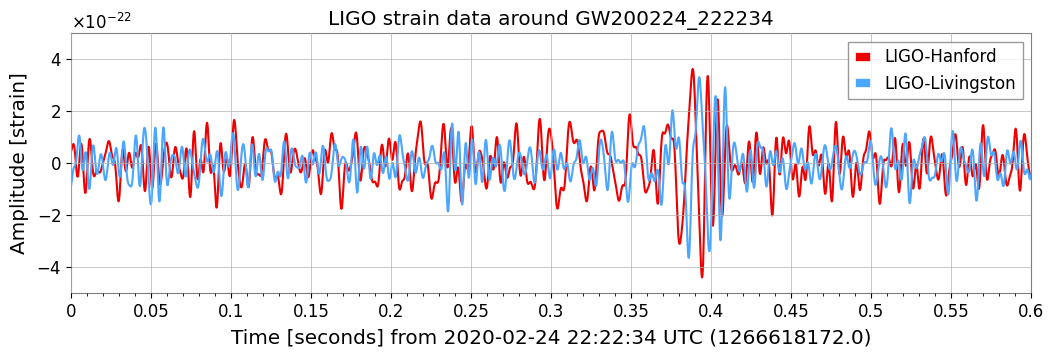

In [59]:
plot = Plot(figsize=[12, 4])
ax = plot.gca()

# labels
ax.plot(hfilt, label='LIGO-Hanford', color='gwpy:ligo-hanford')
ax.plot(lfilt, label='LIGO-Livingston', color='gwpy:ligo-livingston')
ax.set_title('LIGO strain data around GW200224_222234')
ax.set_xscale('seconds', epoch=1266618172)
ax.set_ylabel('Amplitude [strain]')

# graph limits
ax.set_ylim(-5e-22, 5e-22)
ax.set_xlim(1266618172, 1266618172.6)

ax.legend()
plot.show()


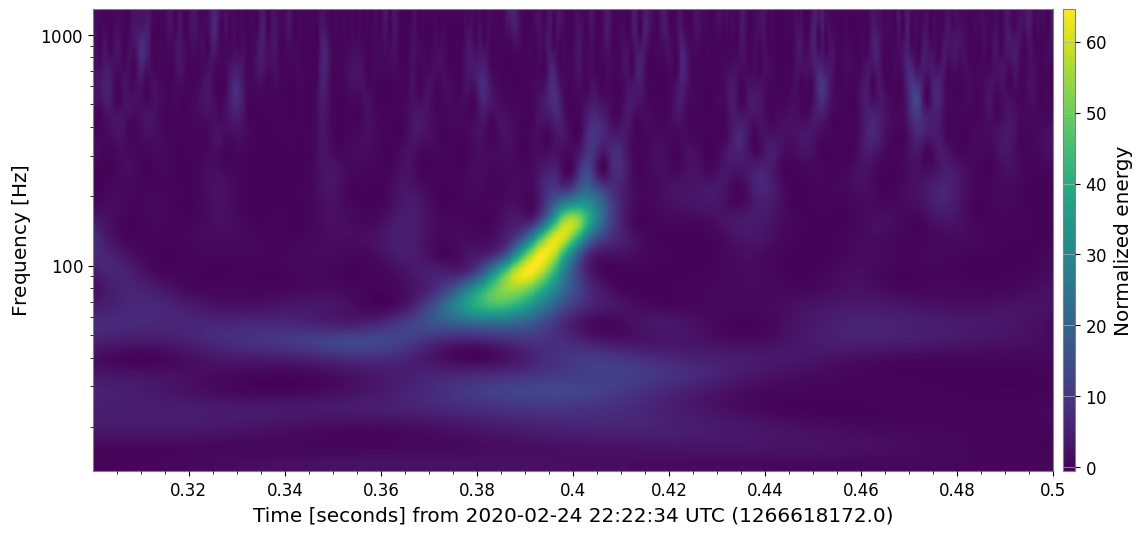

In [62]:
dt = 0.1  #-- Set width of q-transform plot, in seconds
hq = hfilt.q_transform(outseg=(t0-dt, t0+dt))
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalized energy")
ax.grid(False)
ax.set_yscale('log')